In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import seaborn as sns
import os
sns.set_context('poster')
plt.style.use('seaborn-darkgrid')
images_folder='/home/shashank/Lorenz_63/Report/images'

In [118]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')

#Partial or full observation
ob_dim=2
lambda_=0.01
mu=0.1
bias=3.0
N=50 #,120,140
l_scale=0
alpha=1.0

#index of the experiment.....
ind1_=3
seed=50
# State and obs
state=np.load('hidden_path.npy')
obs=np.load('ob{}.npy'.format(ind1_))

#Go inside the data folder......................................
file_label1='{}_seed_{}_bias={}_obs={}_ens={}_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=convex_r=0'.format(ind1_,seed,bias,ob_dim,N,lambda_,mu,0.2)
os.chdir(file_label1)
#os.getcwd()
#Load data....
f_ens1=np.load(file_label1+'f_ensemble.npy')
a_ens1=np.load(file_label1+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean1=np.mean(f_ens1,axis=2)
a_mean1=np.mean(a_ens1,axis=2)
time=np.load(file_label1+'time.npy')
print('time:',time.shape)
print('ensemble:',f_ens1.shape)

time: (50,)
ensemble: (50, 3, 50)


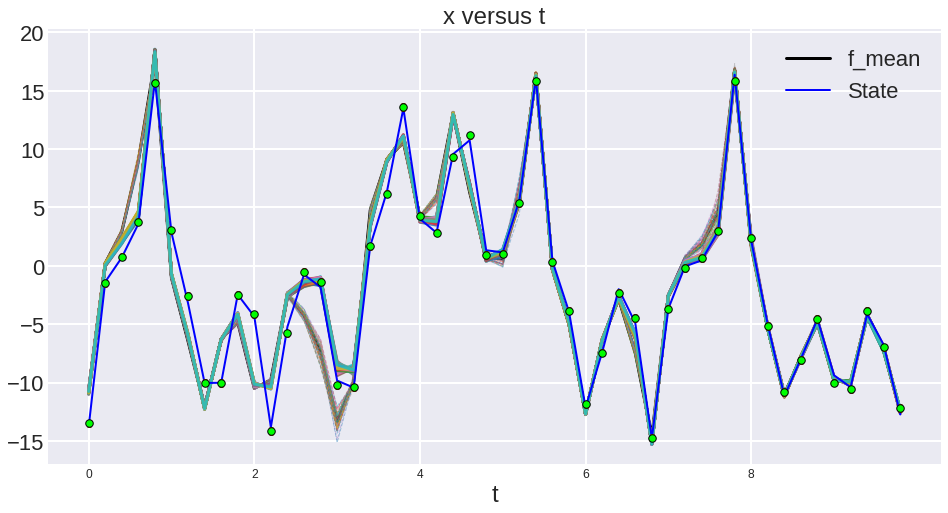

In [119]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0           #time=t_start*0.2*factor
t_stop=50#time.shape[0]  #time=t_stop*0.2*factor

# component to view

comp_=0
ind=list(("x","y","z"))
#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],f_mean1[t_start:t_stop,comp_],c='black',label='f_mean')
plt.plot(time[t_start:t_stop],f_ens1[t_start:t_stop,comp_],linestyle='--',alpha=0.4,lw=1) 
plt.plot(time[t_start:t_stop],a_ens1[t_start:t_stop,comp_],linestyle='solid',alpha=0.8)
#plt.plot(time[t_start:t_stop],a_mean1[t_start:t_stop,comp_],c='g',label='a_mean')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='b',label='State',lw=2)

    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,comp_], yerr=np.sqrt(mu), fmt='.',alpha=1, color='lime',
                    ecolor='saddlebrown', elinewidth=2, capsize=2,ms=15,mec='black')

plt.title(r'{} versus t'.format(ind[comp_]))
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.xlabel('t')
plt.legend()
os.chdir(images_folder)
plt.savefig('seed_{}_bias_3_cov_0_0_1_x.png'.format(seed))

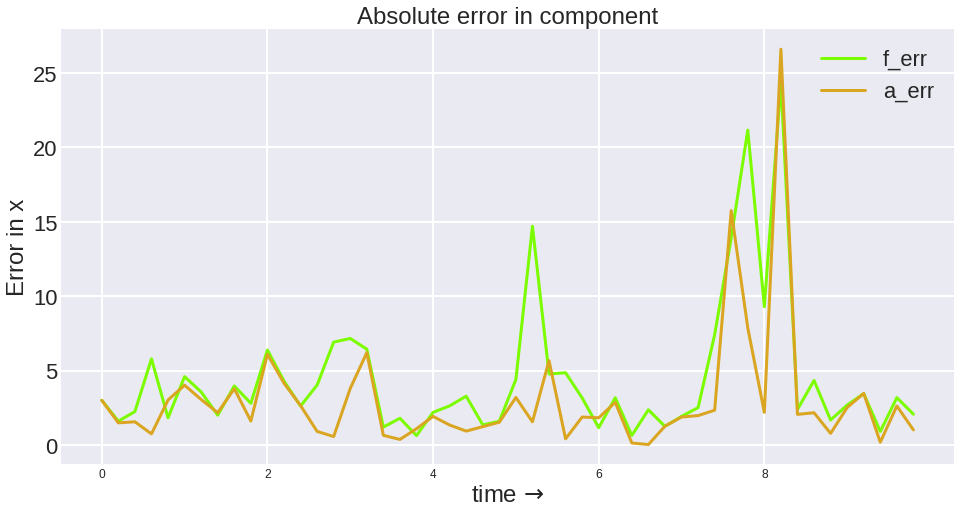

In [94]:
plt.figure(figsize=(16,8))    
plt.plot(time[t_start:t_stop],np.absolute(state[t_start:t_stop,comp_]-f_mean1[t_start:t_stop,comp_]),label='f_err',c='lawngreen')
plt.plot(time[t_start:t_stop],np.absolute(state[t_start:t_stop,comp_]-a_mean1[t_start:t_stop,comp_]),label='a_err',c='goldenrod')
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.title('Absolute error in component')
plt.xlabel(r'time $\to$')
plt.ylabel(r'Error in {}'.format(ind[comp_]))
#plt.ylim(0.1,5)
plt.legend()

In [107]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')

#Partial or full observation
ob_dim=2
lambda_=0.01 # initial ensemble covariance
mu=0.1       # observational
bias=3.0 
N=50 #,120,140
l_scale=0
alpha=1.0

#index of the experiment.....
ind2_=3

# State and obs
state=np.load('hidden_path.npy')
obs=np.load('ob{}.npy'.format(ind2_))

#Go inside the data folder......................................
file_label2='{}_bias={}_obs={}_ens=50_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=convex_r=0'.format(ind2_,bias,ob_dim,lambda_,mu,0.2)
os.chdir(file_label2)
#os.getcwd()
#Load data....
f_ens2=np.load(file_label2+'f_ensemble.npy')
a_ens2=np.load(file_label2+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean2=np.mean(f_ens2,axis=2)
a_mean2=np.mean(a_ens2,axis=2)
time=np.load(file_label2+'time.npy')
time.shape

(50,)

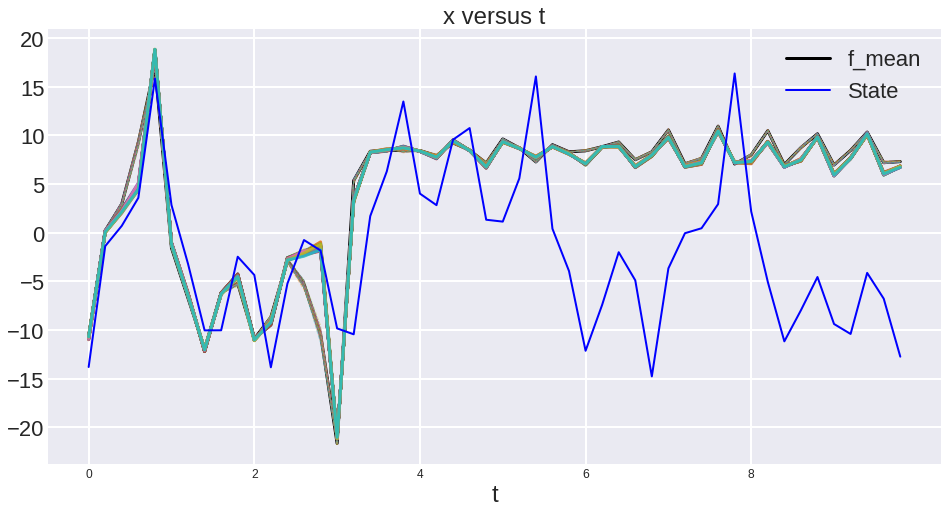

In [110]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0           #time=t_start*0.2*factor
t_stop=50#time.shape[0]  #time=t_stop*0.2*factor

# component to view

comp_=0
ind=list(("x","y","z"))
#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],f_mean2[t_start:t_stop,comp_],c='black',label='f_mean')
plt.plot(time[t_start:t_stop],f_ens2[t_start:t_stop,comp_],linestyle='--',alpha=0.4,lw=1) 
plt.plot(time[t_start:t_stop],a_ens2[t_start:t_stop,comp_],linestyle='solid',alpha=0.8)
#plt.plot(time[t_start:t_stop],a_mean2[t_start:t_stop,comp_],c='g',label='a_mean')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='b',label='State',lw=2)

    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
#plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,comp_], yerr=np.sqrt(mu), fmt='.',alpha=1, color='lime',
#                    ecolor='saddlebrown', elinewidth=2, capsize=2,ms=15,mec='black')

plt.title(r'{} versus t'.format(ind[comp_]))
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.xlabel('t')
plt.legend()
os.chdir(images_folder)
plt.savefig('seed_46_bias_3_cov_0_0_1_x.png')

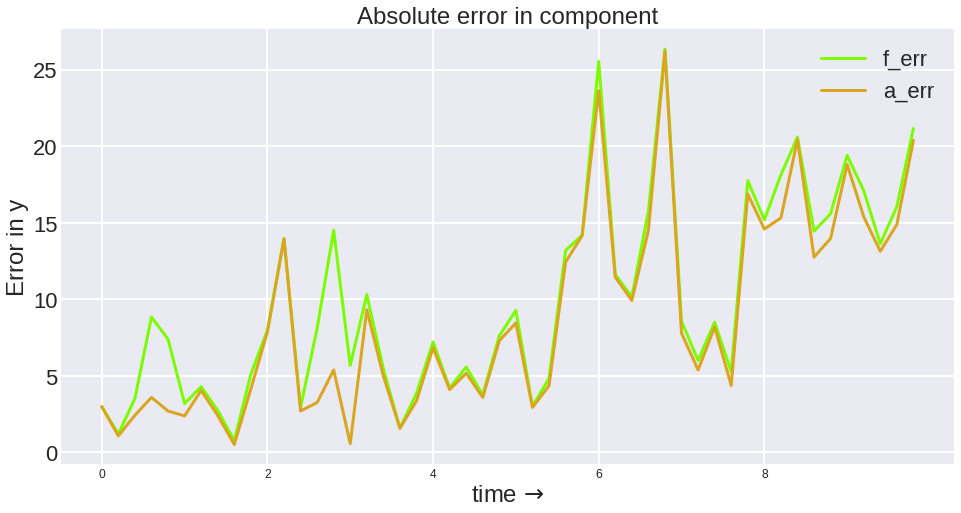

In [97]:
plt.figure(figsize=(16,8))    
plt.plot(time[t_start:t_stop],np.absolute(state[t_start:t_stop,comp_]-f_mean2[t_start:t_stop,comp_]),label='f_err',c='lawngreen')
plt.plot(time[t_start:t_stop],np.absolute(state[t_start:t_stop,comp_]-a_mean2[t_start:t_stop,comp_]),label='a_err',c='goldenrod')
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.title('Absolute error in component')
plt.xlabel(r'time $\to$')
plt.ylabel(r'Error in {}'.format(ind[comp_]))
#plt.ylim(0.1,5)
plt.legend()

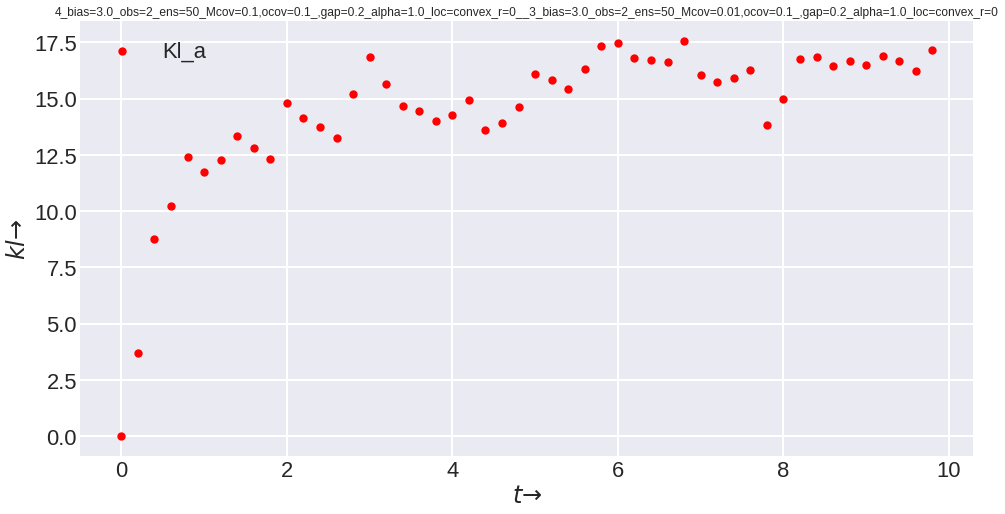

In [178]:
plt.figure(figsize=(16,8))
#plt.scatter(time,kl_vals[:,0],label='Kl_f',s=20)
plt.scatter(time,kl_vals[:,1],label='Kl_a',s=40,c='r')
plt.title(file_label1+'__'+file_label2,fontsize=12)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
plt.savefig('{}_vs_{}'.format(ind1_,ind2_))

# 

# Date 3/2/2020

## Low accuracy, high precision:
bias=5 lambda=0.1

In [3]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
#Partial or full observation
ob_dim=2
lambda_=0.01 # initial ensemble covariance
mu=0.1       # observational
bias=3.0 
N=50 #,120,140
l_scale=0
alpha=1.0

#index of the experiment.....
ind2_=3

# State and obs
state=np.load('hidden_path.npy')
obs=np.load('ob{}.npy'.format(ind2_))

#Go inside the data folder......................................
file_label2='{}_bias={}_obs={}_ens=50_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=convex_r=0'.format(ind2_,bias,ob_dim,lambda_,mu,0.2)
os.chdir(file_label2)
#os.getcwd()
#Load data....
f_ens2=np.load(file_label2+'f_ensemble.npy')
a_ens2=np.load(file_label2+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean2=np.mean(f_ens2,axis=2)
a_mean2=np.mean(a_ens2,axis=2)
time=np.load(file_label2+'time.npy')
time.shape

(50,)

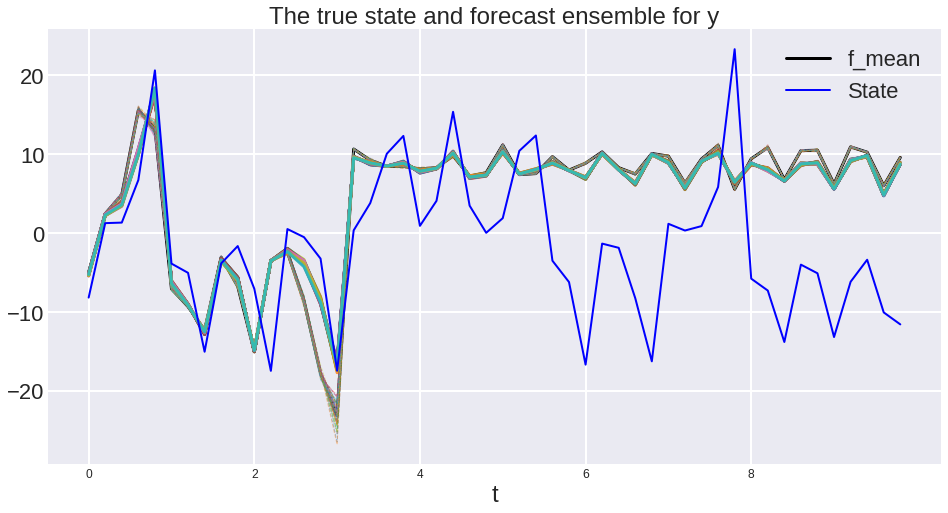

In [4]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0           #time=t_start*0.2*factor
t_stop=50#time.shape[0]  #time=t_stop*0.2*factor

# component to view

comp_=1
ind=list(("x","y","z"))
#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],f_mean2[t_start:t_stop,comp_],c='black',label='f_mean')
plt.plot(time[t_start:t_stop],f_ens2[t_start:t_stop,comp_],linestyle='--',alpha=0.4,lw=1) 
plt.plot(time[t_start:t_stop],a_ens2[t_start:t_stop,comp_],linestyle='solid',alpha=0.8)
#plt.plot(time[t_start:t_stop],a_mean2[t_start:t_stop,comp_],c='g',label='a_mean')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='b',label='State',lw=2)

    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
#plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,comp_], yerr=np.sqrt(mu), fmt='.',alpha=1, color='lime',
#                    ecolor='saddlebrown', elinewidth=2, capsize=2,ms=15,mec='black')

plt.title(r'The true state and forecast ensemble for {}'.format(ind[comp_]))
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.xlabel('t')
plt.legend()

## high accuracy ,Varying precision 
bias=0, lambda=0.01,0.1,0.1

In [8]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
#Partial or full observation
ob_dim=2
lambda_=0.01 # initial ensemble covariance
mu=0.1       # observational
bias=0.0 
N=50 #,120,140
l_scale=0
alpha=1.0

#index of the experiment.....
ind2_=3

# State and obs
state=np.load('hidden_path.npy')
obs=np.load('ob{}.npy'.format(ind2_))

#Go inside the data folder......................................
file_label2='{}_bias={}_obs={}_ens=50_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=convex_r=0'.format(ind2_,bias,ob_dim,lambda_,mu,0.2)
os.chdir(file_label2)
#os.getcwd()
#Load data....
f_ens2=np.load(file_label2+'f_ensemble.npy')
a_ens2=np.load(file_label2+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean2=np.mean(f_ens2,axis=2)
a_mean2=np.mean(a_ens2,axis=2)
time=np.load(file_label2+'time.npy')
time.shape

(50,)

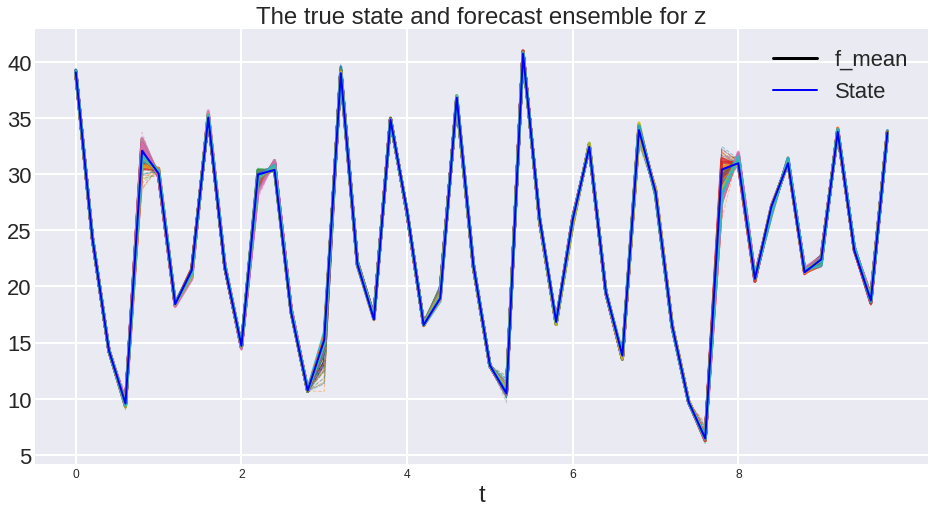

In [9]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0           #time=t_start*0.2*factor
t_stop=50#time.shape[0]  #time=t_stop*0.2*factor

# component to view

comp_=2
ind=list(("x","y","z"))
#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],f_mean2[t_start:t_stop,comp_],c='black',label='f_mean')
plt.plot(time[t_start:t_stop],f_ens2[t_start:t_stop,comp_],linestyle='--',alpha=0.4,lw=1) 
plt.plot(time[t_start:t_stop],a_ens2[t_start:t_stop,comp_],linestyle='solid',alpha=0.8)
#plt.plot(time[t_start:t_stop],a_mean2[t_start:t_stop,comp_],c='g',label='a_mean')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='b',label='State',lw=2)

    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
#plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,comp_], yerr=np.sqrt(mu), fmt='.',alpha=1, color='lime',
#                    ecolor='saddlebrown', elinewidth=2, capsize=2,ms=15,mec='black')

plt.title(r'The true state and forecast ensemble for {}'.format(ind[comp_]))
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.xlabel('t')
plt.legend()

## Moderate accuracy High precision:
bias=1,2 lambda=0.01  Failed to assimilate with 50 ensemble members.

In [14]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
#Partial or full observation
ob_dim=2
lambda_=0.01 # initial ensemble covariance
mu=0.1       # observational
bias=1.0 
N=50 #,120,140
l_scale=0
alpha=1.0

#index of the experiment.....
ind2_=3

# State and obs
state=np.load('hidden_path.npy')
obs=np.load('ob{}.npy'.format(ind2_))

#Go inside the data folder......................................
file_label2='{}_bias={}_obs={}_ens=50_Mcov={},ocov={}_,gap={}_alpha=1.0_loc=convex_r=0'.format(ind2_,bias,ob_dim,lambda_,mu,0.2)
os.chdir(file_label2)
#os.getcwd()
#Load data....
f_ens2=np.load(file_label2+'f_ensemble.npy')
a_ens2=np.load(file_label2+'a_ensemble.npy') #ens has shape:=[time steps,system dimension,ensemble number]
f_mean2=np.mean(f_ens2,axis=2)
a_mean2=np.mean(a_ens2,axis=2)
time=np.load(file_label2+'time.npy')
time.shape

(50,)

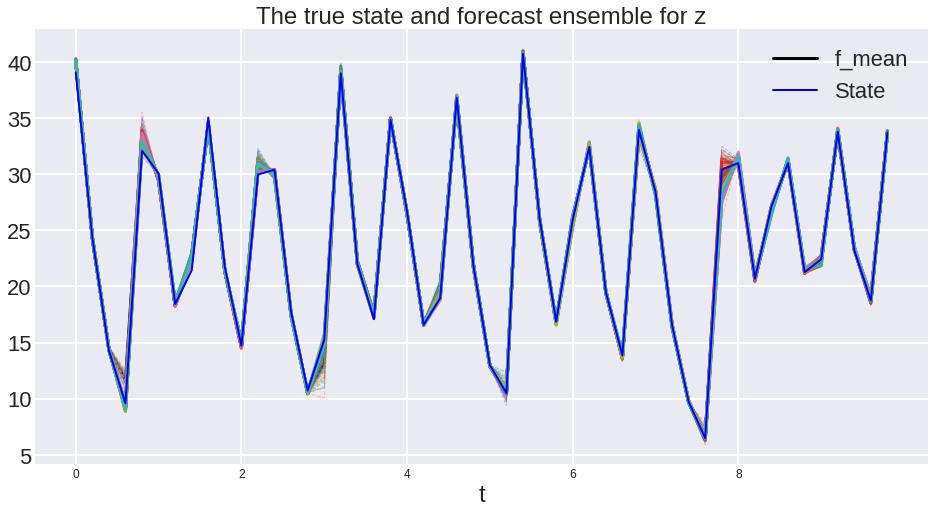

In [15]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0           #time=t_start*0.2*factor
t_stop=50#time.shape[0]  #time=t_stop*0.2*factor

# component to view
comp_=2
ind=list(("x","y","z"))
#plt.ylim(-15,15)
#for i in range(15):
plt.plot(time[t_start:t_stop],f_mean2[t_start:t_stop,comp_],c='black',label='f_mean')
plt.plot(time[t_start:t_stop],f_ens2[t_start:t_stop,comp_],linestyle='--',alpha=0.4,lw=1) 
plt.plot(time[t_start:t_stop],a_ens2[t_start:t_stop,comp_],linestyle='solid',alpha=0.8)
#plt.plot(time[t_start:t_stop],a_mean2[t_start:t_stop,comp_],c='g',label='a_mean')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='b',label='State',lw=2)

    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='r',marker='.',label='obs')
#plt.errorbar(time[t_start:t_stop], obs[t_start:t_stop,comp_], yerr=np.sqrt(mu), fmt='.',alpha=1, color='lime',
#                    ecolor='saddlebrown', elinewidth=2, capsize=2,ms=15,mec='black')

plt.title(r'The true state and forecast ensemble for {}'.format(ind[comp_]))
plt.xticks(0.2*np.arange(t_start,t_stop,10),fontsize=12)
plt.xlabel('t')
plt.legend()

## Kl-divergence plots:
### Varying bias =1,2,3 fixed covariance=0.01

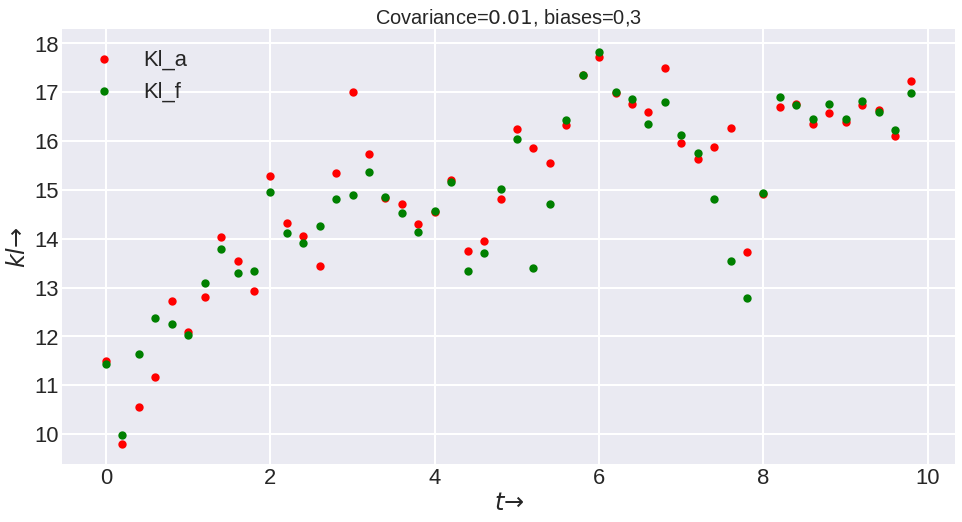

In [69]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
cv=0.01
kl_vals_low_cov=np.load('kl_vals_fixed_lambda={}.npy'.format(cv))
ind1,ind2=0,2   # 0.0 bias is being compared with bias ind2+1
plt.figure(figsize=(16,8))
plt.scatter(time,kl_vals_low_cov[:,1,ind2],label='Kl_a',s=40,c='r')
plt.scatter(time,kl_vals_low_cov[:,0,ind2],label='Kl_f',s=40,c='g')
plt.title(r'Covariance=${}$, biases={},{}'.format(cv,ind1,ind2+1),fontsize=20)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir(images_folder)
plt.savefig('cov={},{}_vs_{}.png'.format(cv,ind1,ind2+1))

## Kl-divergence plots:
### Varying bias =1,2,3 fixed covariance=0.1

<Figure size 1152x576 with 0 Axes>

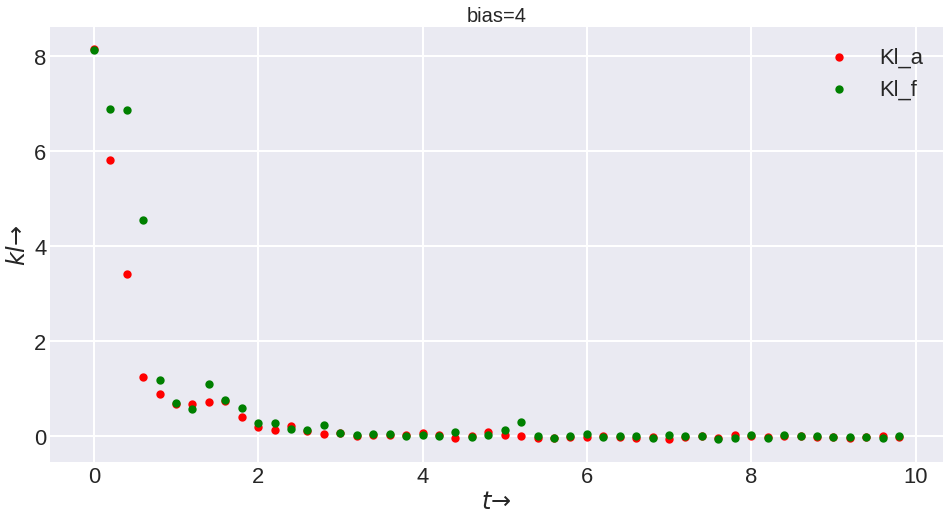

In [13]:
kl_vals_mid_cov=np.load('kl_vals_fixed_lambda=0.1.npy')
plt.figure(figsize=(16,8))
ind1,ind2=0,3
plt.figure(figsize=(16,8))
plt.scatter(time,kl_vals_mid_cov[:,1,ind2-1],label='Kl_a',s=40,c='r')
plt.scatter(time,kl_vals_mid_cov[:,0,ind2-1],label='Kl_f',s=40,c='g')
plt.title('bias={}'.format(ind2+1),fontsize=20)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')

## Kl-divergence plots:
### Varying bias =1,2,3 fixed covariance=1.0

<Figure size 1152x576 with 0 Axes>

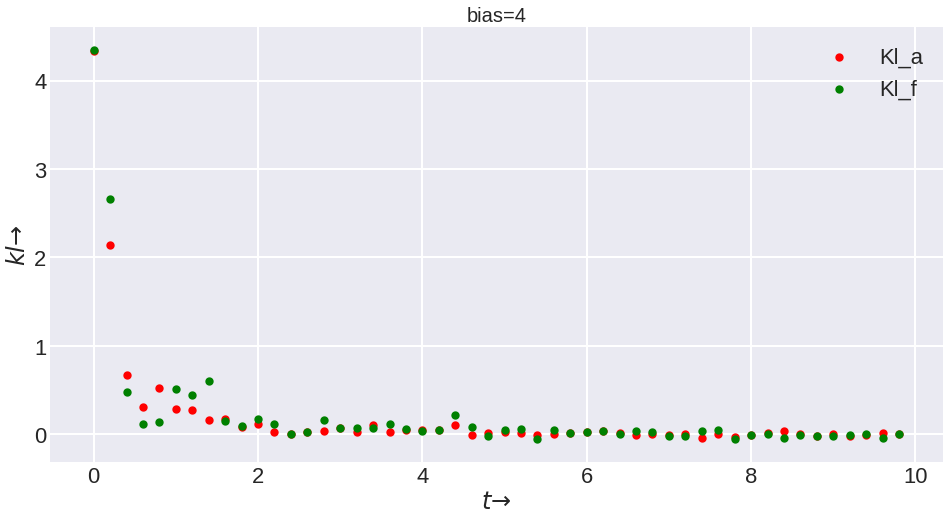

In [16]:
kl_vals_high_cov=np.load('kl_vals_fixed_lambda=1.0.npy')
plt.figure(figsize=(16,8))
ind1,ind2=0,3
plt.figure(figsize=(16,8))
plt.scatter(time,kl_vals_high_cov[:,1,ind2-1],label='Kl_a',s=40,c='r')
plt.scatter(time,kl_vals_high_cov[:,0,ind2-1],label='Kl_f',s=40,c='g')
plt.title('bias={}'.format(ind2+1),fontsize=20)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')

# L2 error.

We wish to see a case where the filter fails, but is stable.
A case where multiple runs of filter, with different initial distances, kl distances being similar,but they
are all far away from the truth. 

## We now change the seed of the initial ensemble to arrive at the following:
For different realization of the ensembles. Also, fix your observation. Then check how much does it vary. Choose 5-10 differet realizations. 10 combinations to be averaged upon.

# Effect of changing the initial ensemble variance.

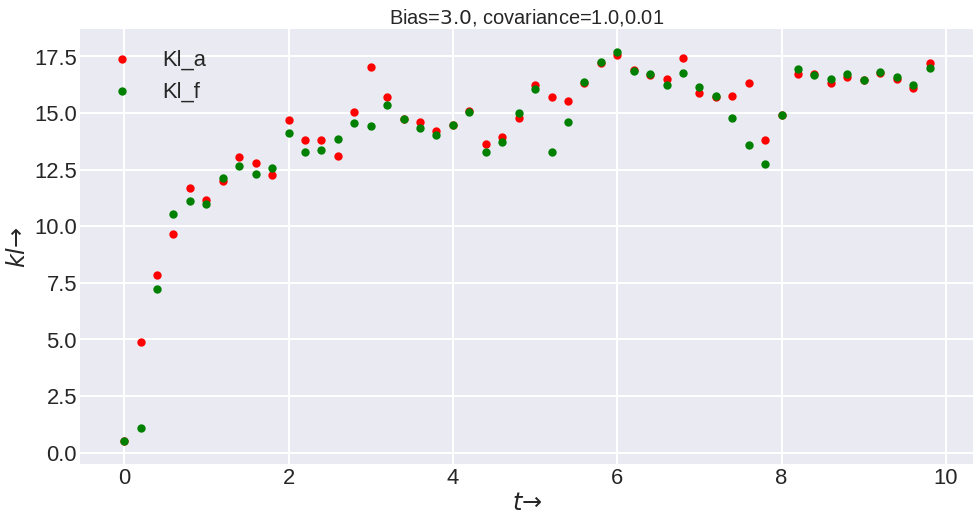

In [34]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
bias_=3.0
var_=list(("1.0","0.1","0.01"))
kl_vals_low_cov=np.load('kl_vals_fixed_bias={}_base={}.npy'.format(bias_,1.0))
ind1,ind2=0,2   # 0.0 bias is being compared with bias ind2+1
plt.figure(figsize=(16,8))
plt.scatter(time,kl_vals_low_cov[:,1,ind2],label='Kl_a',s=40,c='r')
plt.scatter(time,kl_vals_low_cov[:,0,ind2],label='Kl_f',s=40,c='g')
plt.title(r'Bias=${}$, covariance={},{}'.format(bias_,var_[ind1],var_[ind2]),fontsize=20)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir(images_folder)
plt.savefig('bias={}_base={},{}_vs_{}.png'.format(bias_,1.0,ind1,ind2+1))

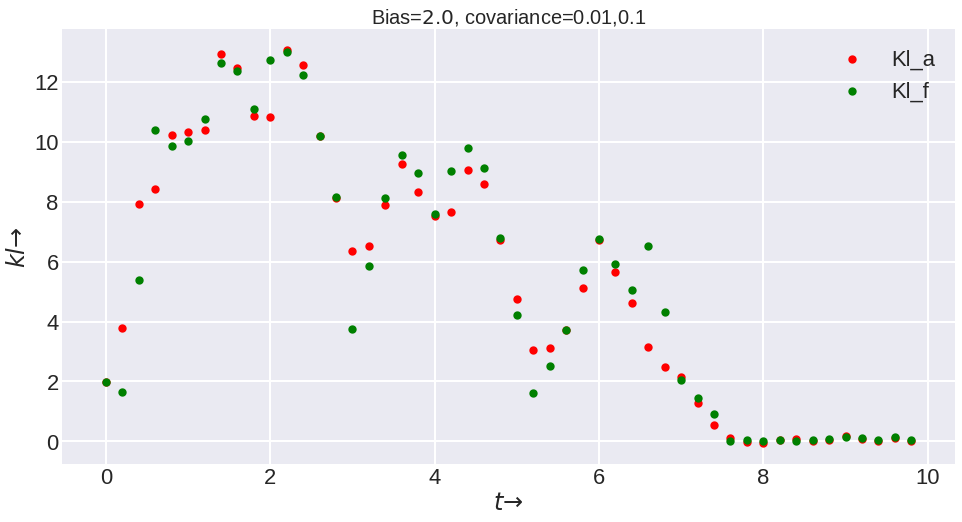

In [81]:
os.chdir('/home/shashank/Lorenz_63/Comparison_PF_Enkf')
bias_=2.0
var_=list(("0.01","0.1","1.0"))
kl_vals_low_cov=np.load('kl_vals_fixed_bias={}.npy'.format(bias_))
ind1,ind2=0,1   # 0.0 bias is being compared with bias ind2+1
plt.figure(figsize=(16,8))
plt.scatter(time,kl_vals_low_cov[:,1,ind2],label='Kl_a',s=40,c='r')
plt.scatter(time,kl_vals_low_cov[:,0,ind2],label='Kl_f',s=40,c='g')
plt.title(r'Bias=${}$, covariance={},{}'.format(bias_,var_[ind1],var_[ind2]),fontsize=20)
plt.legend()
plt.xlabel(r'$t \to$')
plt.ylabel(r'$kl \to$')
os.chdir(images_folder)
#plt.savefig('cov={},{}_vs_{}.png'.format(bias_,ind1,ind2+1))